<a href="https://colab.research.google.com/github/adityasingh345/House_prediction_linear_regression_model/blob/main/house_predictions_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import the dataset /content/train.csv
df = pd.read_csv('/content/train.csv')

In [5]:
df.shape
# basically means that 81 columns and 1460 entries

(1460, 81)

In [6]:
# import the test data
df_test = pd.read_csv('/content/test.csv')
df_test.shape

(1459, 80)

In [7]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [9]:
df.SalePrice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


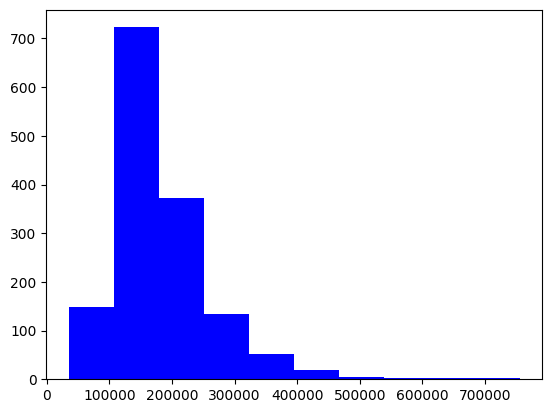

In [10]:
df.SalePrice.skew()
plt.hist(df.SalePrice, color='blue')
plt.show()
# the distribution on the right side has a longer tail on the right
#therefore the distribution is +ve skewed

0.12133506220520406


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

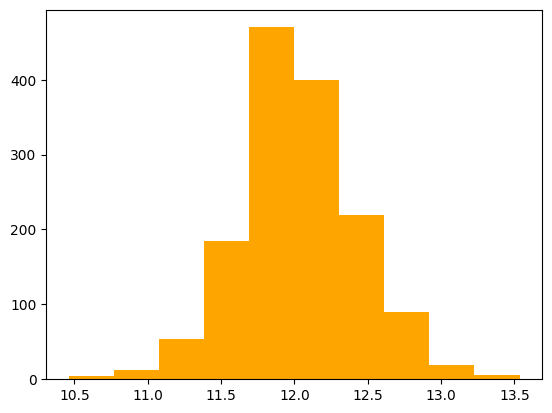

In [11]:
target = np.log(df.SalePrice)
print(target.skew())
plt.hist(target, color='orange')

In [12]:
num_features = df.select_dtypes(include=[np.number])
num_features.dtypes
# here we have all the numerical features

,0
Id,int64
MSSubClass,int64
LotFrontage,float64
LotArea,int64
OverallQual,int64
OverallCond,int64
YearBuilt,int64
YearRemodAdd,int64
MasVnrArea,float64
BsmtFinSF1,int64


In [13]:
# in this weh have target our SalePrice
#corelation betcolumns and target
corr = num_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

# the first 5 show +ve corelation with saleprice
# the last five -ve corelation with saleprice


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [14]:
quality_pivot = df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

<ipython-input-14-8586ab5cda27>:1: FutureWarning: The provided callable <function median at 0x7ec0c613b600> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  quality_pivot = df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)


In [15]:
quality_pivot
# form this we can get the conclusion that as the overall quality increases the sale prices increase

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108000.0
5,133000.0
6,160000.0
7,200141.0
8,269750.0
9,345000.0


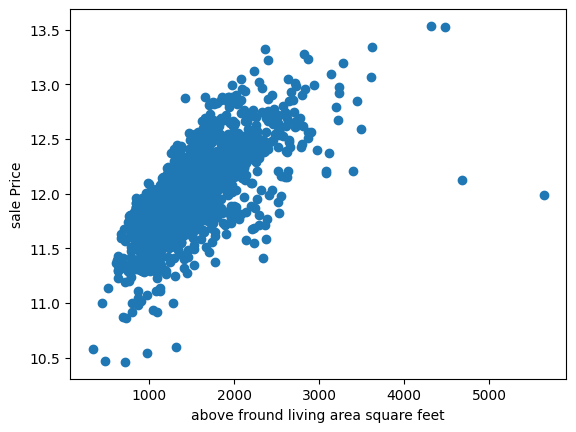

In [16]:
# to get into more practise we can find relation between grlivearea and saleprice
plt.scatter(x=df['GrLivArea'], y = target)
plt.ylabel('sale Price')
plt.xlabel('above fround living area square feet')
plt.show()

# what we see that is increases in living area corresponds to a increase
#in price

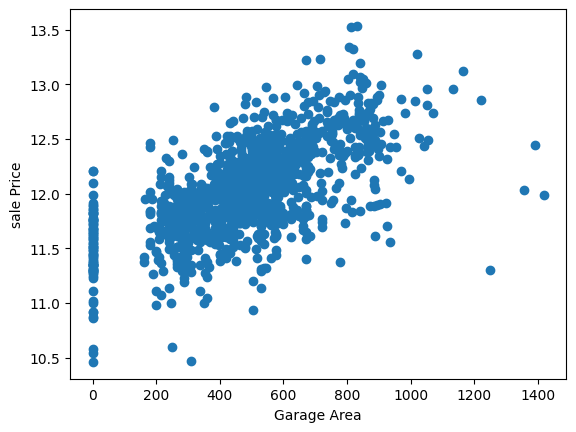

In [17]:
# now we will do the same for garrage area
plt.scatter(x=df['GarageArea'], y = target)
plt.ylabel('sale Price')
plt.xlabel('Garage Area')
plt.show()

In [18]:
df.isnull().sum()
# you can see these all the features in which how many null values are there

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [19]:
null = pd.DataFrame(df.isnull().sum().sort_values(ascending = False)[: 25])
null
# arranged in increasing to decreasing order
# PoolQC means pool quality Pool Quality is zero when Pool area is 0
# and similarly we can find the relation between garage related columns

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [20]:
#non -numerical features are named as categorical
categorical = df.select_dtypes(exclude=[np.number])
categorical.describe()
# count= count of non-null observations,
# unique= number of unique values
#top= most commnlyoccuring values
# frequency = frequency of the top value shown by freq

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [21]:
print(df.Street.value_counts())
# our model need numerical data, so we will now one-hot encoding.

Street
Pave    1454
Grvl       6
Name: count, dtype: int64


In [22]:
# we will do one-hot-encoding for the first time
test = pd.read_csv('/content/test.csv')

In [23]:
# pd,get_dummies will handle the one-hot-encoding
df['enc_street'] =pd.get_dummies(df.Street, drop_first=True)
test['enc_street'] =pd.get_dummies(df.Street, drop_first=True)

In [24]:
print('Encoded value', df.enc_street.value_counts())

Encoded value enc_street
True     1454
False       6
Name: count, dtype: int64


<ipython-input-25-81d608aac2d3>:8: FutureWarning: The provided callable <function median at 0x7ec0c613b600> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  condition_pivot = df.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)


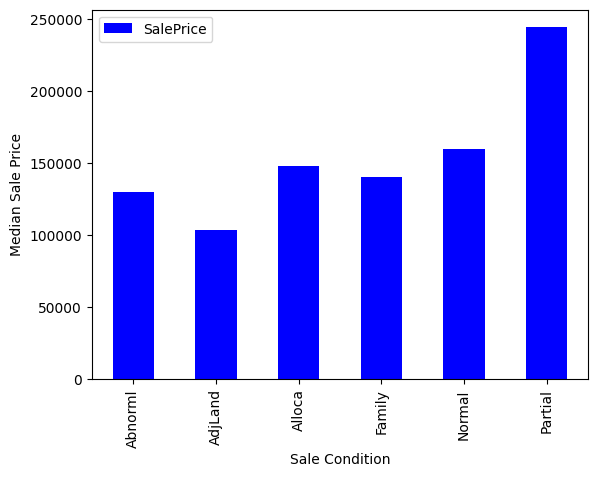

In [25]:
# so finally we have engineered . Feature ENgineering
#is the process of making the features of the data suitable for use in
#machine learning and modelling. when we encoded the street feature into
#column of boolean values , we have engineered a feature.
# another feature is SaleCondition by constructing a pivot table as we did
#for Overall Qual.

condition_pivot = df.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.show()

In [26]:
# for partial it has a significantly high sale price
# We select all of the houses where SaleCondition
# for partial it has a significantly high sale price
# We select all of the houses where SaleCondition
#is equal to Patrial and assign the value 1, otherwise assign 0.
def encode(x):
  return 1 if x == 'Partial' else 0
df['enc_condition'] = df.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

<ipython-input-27-0beedf91c8cb>:1: FutureWarning: The provided callable <function median at 0x7ec0c613b600> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  condition_pivot = df.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)


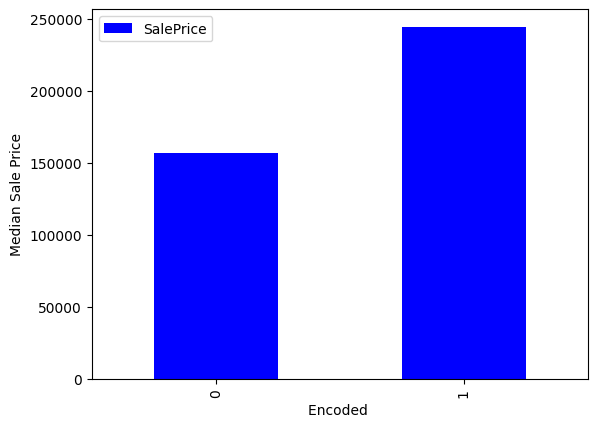

In [27]:
condition_pivot = df.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded ')
plt.ylabel('Median Sale Price')
plt.show()

In [28]:
data = df.select_dtypes(include=[np.number]).interpolate().dropna()

In [29]:
sum(data.isnull().sum() != 0)

0

Training Model

In [51]:
y = np.log(df.SalePrice)

non_numeric_column = df.select_dtypes(exclude=[np.number]).columns

## Apply one-hot encoding to multiple categorical columns
#one_hot_encoded_df = pd.get_dummies(df, columns=['column1', 'column2', 'column3'])

df_encoded = pd.get_dummies(df, columns= non_numeric_column, dummy_na = False)

x = df_encoded.drop(['SalePrice', 'Id'], axis = 1 )

non_numeric_cols_test = df_test.select_dtypes(exclude=[np.number]).columns
df_test_encoded = pd.get_dummies(df_test, columns=non_numeric_cols_test, dummy_na=False)

In [46]:
print(x)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=42, test_size=0.33)

In [55]:
# import linear regression model from sklearn
from sklearn import linear_model
lm = linear_model.LinearRegression()
from sklearn.impute import SimpleImputer

In [57]:
imputer = SimpleImputer(missing_values =np.nan , strategy='median')

In [60]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test);

In [62]:
model = lm.fit(X_train_imputed, Y_train)

In [65]:
# evaluate the performance of this model
print('R^2 is:', model.score(X_test_imputed, Y_test))

R^2 is: 0.8966483827013692


In [66]:
# what does that 0.896648... means it means that our feature
# explain approximately 89

In [78]:
submission = pd.DataFrame()
submission['id'] = test['Id']

non_numeric_cols_test = df_test.select_dtypes(exclude=[np.number]).columns
df_test_encoded = pd.get_dummies(df_test, columns=non_numeric_cols_test, dummy_na=False)

# Align columns between training and test dataframes after one-hot encoding
# This adds missing columns to the test set and drops extra columns
X_train_cols = x.columns
df_test_encoded = df_test_encoded.reindex(columns=X_train_cols, fill_value=0)

if 'SalePrice' in df_test_encoded.columns:
    df_test_encoded = df_test_encoded.drop('SalePrice', axis=1)



# Impute missing values in the processed test data using the same imputer fitted on training data
feats = imputer.transform(df_test_encoded)

# Ensure the number of features in feats matches the model's expected input
if feats.shape[1] != model.n_features_in_:
    print(f"Warning: Feature count mismatch. Expected {model.n_features_in_}, got {feats.shape[1]}")
    # You might need further debugging here if column alignment didn't work as expected


In [79]:
predictions= model.predict(feats)

In [80]:
final_prediction = np.exp(predictions)

In [81]:
submission['SalePrice'] = final_prediction

In [82]:
print(submission.head())

     id      SalePrice
0  1461  121498.262959
1  1462  180354.181734
2  1463  175256.800998
3  1464  189939.113594
4  1465  188794.683330
